## Airbnb Market & Pricing Analysis

### Business Objective
This project analyzes Airbnb listings data to uncover pricing patterns, demand drivers, and customer behavior insights.  
The goal is to help short-term rental businesses and hospitality companies optimize pricing, improve occupancy, and identify high-performing locations.

### Key Questions Answered
- Which room types generate higher prices?
- How does location impact listing demand?
- What role do reviews play in pricing and popularity?
- How does demand change over time?

### Business Relevance
Insights from this analysis are directly applicable to:
- Hospitality & tourism companies
- Property management firms
- Short-term rental platforms

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("compressed_data.csv.gz", compression='gzip')
df.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [69]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

## Data Cleaning & Preprocessing

In [70]:
# checking missing values
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [72]:
# handling missing values

df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')       # converts missing values into Nat--not a thing

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [74]:
df['reviews per month'].fillna(0, inplace=True)
# listings with no reviews are assumed to have zero monthly review activity.

In [75]:
df.dropna(subset = ["NAME", "host name"], inplace = True)

In [76]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                        15777
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [79]:
df = df.drop(columns=["license", "house_rules"], errors="ignore")

In [80]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,NaT,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [81]:
# remove dollar sign and convert to float

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '',regex=True).astype(float)

In [82]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaT,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [83]:
# remove duplicates

df.drop_duplicates(inplace = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object 

In [85]:
# descriptive statistics

df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,1.163207,3.278558,7.948463,141.164660
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,1.683708,1.285369,32.328974,135.419199
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [86]:
# checking for invalid negative values
df[['minimum nights','availability 365']].describe()

,minimum nights,availability 365
count,101016.000000,100990.000000
mean,8.113744,141.164660
std,30.378014,135.419199
min,-1223.000000,-10.000000
25%,2.000000,3.000000
50%,3.000000,96.000000
75%,5.000000,269.000000
max,5645.000000,3677.000000


In [88]:
# removing logically invalid negative values
df = df[df['minimum nights'] >= 0]
df = df[df['availability 365'] >= 0]

In [89]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.001820e+05,1.001820e+05,100174.000000,100174.000000,100006.000000,99944.000000,99916.000000,100182.000000,100056.000000,100182.000000,99893.000000,99867.000000,100182.000000
mean,2.935406e+07,4.924988e+10,40.728067,-73.949610,2012.486521,625.522212,125.072271,8.108503,27.401445,1.166128,3.279219,7.971021,141.665259
std,1.623206e+07,2.853573e+10,0.055873,0.049522,5.762733,331.619741,66.315317,28.124660,49.226349,1.682736,1.284750,32.390649,135.371401
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.528285e+07,2.456539e+10,40.688710,-73.982530,2007.000000,340.000000,68.000000,2.000000,1.000000,0.090000,2.000000,1.000000,4.000000
50%,2.946163e+07,4.911751e+10,40.722280,-73.954430,2012.000000,625.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,98.000000
75%,4.339298e+07,7.398166e+10,40.762760,-73.932270,2017.000000,913.000000,183.000000,5.000000,30.000000,1.720000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


### Data Quality Handling
Negative values were identified in `minimum_nights` and `availability_365`, which are logically invalid for short-term rental listings.

Such records were removed to ensure data quality and analytical reliability.


# VISUALIZATION

“How are listing prices distributed, and what does this imply for pricing strategy?”

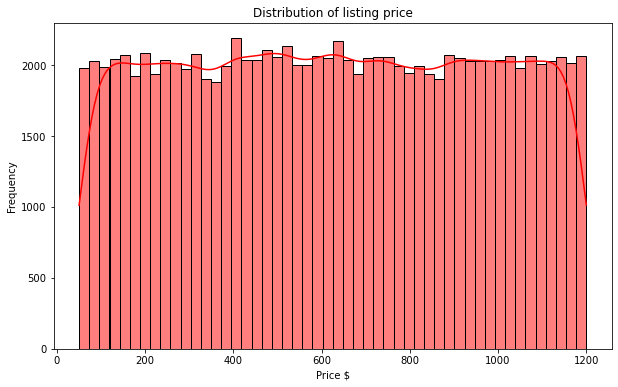

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins= 50,kde = True, color = 'red')
plt.title('Distribution of listing price')
plt.xlabel('Price $')
plt.ylabel('Frequency')
plt.show()

### Insight
Listing prices show a right-skewed distribution, indicating that most properties are moderately priced while a smaller segment targets premium customers.

### Business Implication
- Budget and mid-range listings dominate the market
- Premium pricing strategies should focus on differentiation (location, amenities, room type)


# Room Type Analysis (Revenue drivers)

In [19]:
df['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

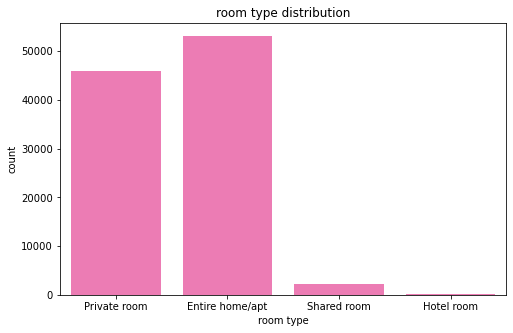

In [20]:
plt.figure(figsize = (8,5))
sns.countplot(x= "room type", data = df,color = "hotpink")
plt.title("room type distribution")
plt.xlabel("room type")
plt.ylabel("count")
plt.show()

### Insight
Entire homes/apartments dominate the supply and consistently command higher prices than private or shared rooms.

### Business Implication
- Entire-home listings offer higher revenue potential
- These listings are well-suited for families, groups, and longer stays

# Neighbourhood Analysis

Which neighbourhoods have the highest listing concentration, and what does this indicate about market competition?

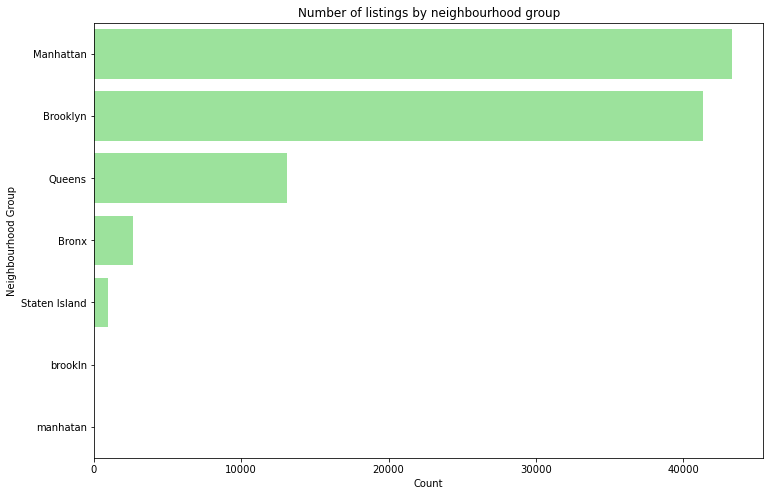

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(y='neighbourhood group', data=df,color="lightgreen", order=df['neighbourhood group'].value_counts().index)
plt.title("Number of listings by neighbourhood group")
plt.xlabel("Count")
plt.ylabel('Neighbourhood Group')
plt.show()

### Insight
A small number of neighbourhood groups account for a disproportionately large share of listings, indicating high market concentration.

### Business Implication
- Saturated neighbourhoods face intense competition and pricing pressure
- Less saturated areas may offer higher growth potential for new listings

### Strategic Takeaway
Hospitality and property management companies should balance visibility in high-demand areas with expansion into underpenetrated neighbourhoods for long-term growth.

## Pricing Patterns Across Neighbourhoods

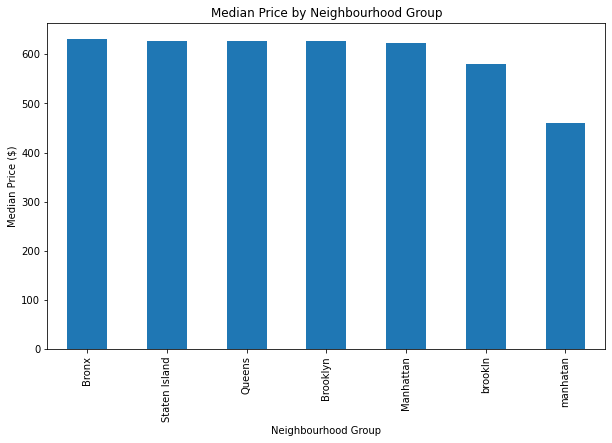

In [25]:
neigh_price = (
    df.groupby('neighbourhood group')['price']
      .median()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
neigh_price.plot(kind='bar')
plt.title('Median Price by Neighbourhood Group')
plt.ylabel('Median Price ($)')
plt.xlabel('Neighbourhood Group')
plt.show()


### Insight
Neighbourhoods with fewer listings often show higher median prices, suggesting scarcity-driven pricing.

### Business Implication
Premium neighbourhoods can sustain higher prices, while competitive areas may require dynamic pricing strategies to maintain occupancy.

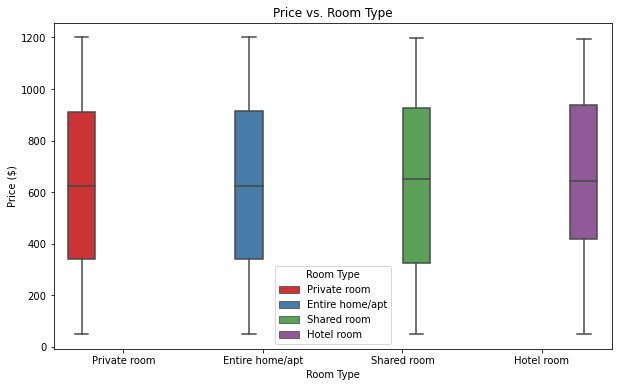

In [22]:
# what is the relationship between price and room type?

plt.figure(figsize=(10,6))
sns.boxplot(x="room type", y="price", hue="room type", data=df, palette='Set1')
plt.title("Price vs. Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.legend(title="Room Type")
plt.show()

### Insight
Entire homes consistently show higher median prices compared to private and shared rooms.

### Business Implication
- Hosts offering entire homes have greater revenue potential
- Property managers should prioritize entire-unit listings in premium neighborhoods

# Reviews Over Time

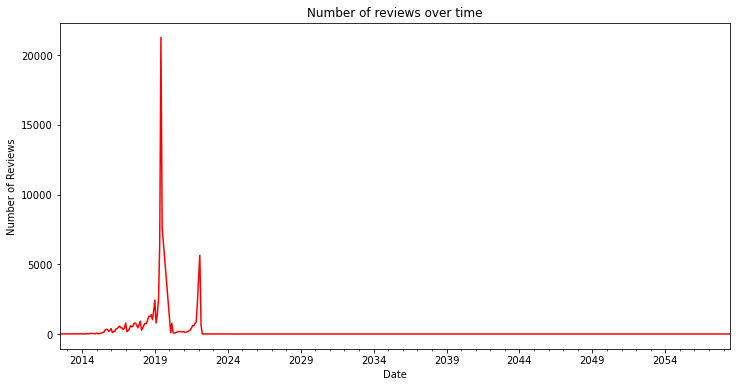

In [23]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of reviews over time')
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()

### Insight
Review activity increases over time, indicating growing platform adoption and customer engagement.

### Business Implication
- Positive reviews are a key demand driver
- Encouraging guest feedback can directly improve visibility and bookings

## Price vs Reviews (Demand proxy)

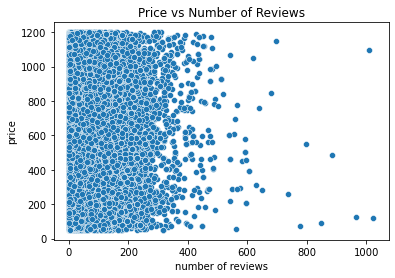

In [24]:
sns.scatterplot(x='number of reviews', y='price', data=df)
plt.title('Price vs Number of Reviews')
plt.show()

### Insight
Listings with higher review counts cluster around competitive price ranges.

### Business Implication
- Overpricing reduces demand
- Competitive pricing combined with strong reviews improves long-term performance

## Executive Summary
- Entire-home listings generate higher revenue compared to other room types
- Location significantly impacts both listing concentration and pricing power
- Competitive pricing combined with strong customer reviews drives higher demand
- Review trends indicate increasing adoption of short-term rental platforms

## Recommendations
- Prioritize entire-home listings in high-demand and premium neighbourhoods
- Use competitive and dynamic pricing strategies in saturated markets
- Encourage guest reviews to improve visibility and booking performance
- Explore underpenetrated neighbourhoods for long-term growth opportunities